# Load Data

In [2]:
import pandas as pd

df = pd.read_csv('Document_Categorization.csv')
df.head()

,category,news
0,accident,['নওগাঁর মহাদেবপুর উপজেলার নওগাঁ-রাজশাহী মহাসড...
1,accident,['মংলা বন্দরের শিল্পাঞ্চল এলাকায় নির্মাণাধীন ...
2,accident,['মংলা বন্দরের শিল্পাঞ্চল এলাকায় নির্মাণাধীন ...
3,accident,['ঢাকা-ময়মনসিংহ রেললাইনের গাজীপুরের শ্রীপুর উ...
4,accident,['রাজধানীর পুরানা পল্টন থানা এলাকায় গতকাল বৃহ...


# Assing id to each news category. 

In [3]:
from io import StringIO

col = ['category', 'news']
df = df[col]
df = df[pd.notnull(df['news'])]
df.columns = ['category', 'news']
df['category_id'] = df['category'].factorize()[0]
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.head()

,category,news,category_id
0,accident,['নওগাঁর মহাদেবপুর উপজেলার নওগাঁ-রাজশাহী মহাসড...,0
1,accident,['মংলা বন্দরের শিল্পাঞ্চল এলাকায় নির্মাণাধীন ...,0
2,accident,['মংলা বন্দরের শিল্পাঞ্চল এলাকায় নির্মাণাধীন ...,0
3,accident,['ঢাকা-ময়মনসিংহ রেললাইনের গাজীপুরের শ্রীপুর উ...,0
4,accident,['রাজধানীর পুরানা পল্টন থানা এলাকায় গতকাল বৃহ...,0


# Print Total number of news and total number of news for each category

In [4]:
print('Total News', df.shape[0])
print('------------------------------')

print(df.groupby('category').news.count())

Total News 5988
------------------------------
category
accident         499
art              499
crime            499
economics        499
education        499
entertainment    499
environment      499
international    499
opinion          499
politics         499
science_tech     499
sports           499
Name: news, dtype: int64


# Show total number of news for each category in graph

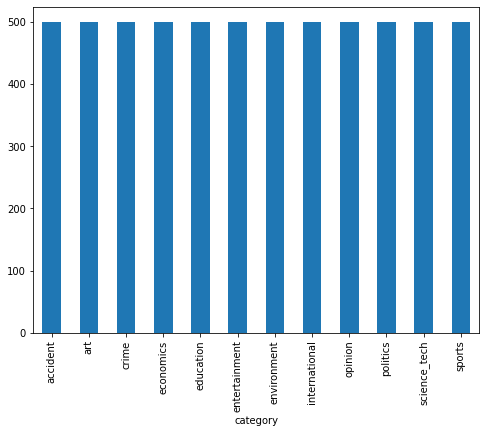

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
df.groupby('category').news.count().plot.bar(ylim=0)
plt.show()

# Calculate the tfidf using TfidfVectorizer

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.news).toarray()
labels = df.category_id
print(features.shape)

(5988, 44442)


# Check the unigrams and bigrams

In [7]:
N = 2
for newCategory, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(newCategory))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'accident':
  . Most correlated unigrams:
. থল
. আহত
  . Most correlated bigrams:
. ঘটন ঘট
. ঘটন থল
# 'art':
  . Most correlated unigrams:
. ছদ
. উপন
  . Most correlated bigrams:
. রক শন
. রচ ছদ
# 'crime':
  . Most correlated unigrams:
. উপজ
. ওস
  . Most correlated bigrams:
. উদ কর
. আটক কর
# 'economics':
  . Most correlated unigrams:
. ঋণ
. ঞপ
  . Most correlated bigrams:
. যবস পন
. পন পর
# 'education':
  . Most correlated unigrams:
. iii
. ii
  . Most correlated bigrams:
. বহ চন
. রশ তর
# 'entertainment':
  . Most correlated unigrams:
. ছব
. চলচ
  . Most correlated bigrams:
. পর শন
. অভ নয
# 'environment':
  . Most correlated unigrams:
. পম
. আবহ
  . Most correlated bigrams:
. দপ তর
. অধ দপ
# 'international':
  . Most correlated unigrams:
. এএফপ
. আইএস
  . Most correlated bigrams:
. খবর এএফপ
. খবর হয
# 'opinion':
  . Most correlated unigrams:
. জনগণ
. নয়
  . Most correlated bigrams:
. বব লয়
. রয় জন
# 'politics':
  . Most correlated unigrams:
. আওয
. এনপ
  . Most correlated bigr

# Import library for spliting trainig and testing data. Calulating the accuracy

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Split training and testing data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, df['category'], test_size=0.20, random_state=42)

# MultinomialNB

In [10]:
from sklearn.naive_bayes import MultinomialNB

mnbClf = MultinomialNB()
mnbClf.fit(X_train, y_train)
mnbClf_pred = mnbClf.predict(X_test)
cm = confusion_matrix(y_test, mnbClf_pred)
print(cm)
accuracy_score(y_test, mnbClf_pred)

[[115   1   1   0   2   0   1   0   0   0   0   0]
 [  0  92   0   0   0   0   0   0   1   0   0   0]
 [  6   0  88   0   0   0   4   1   2   5   0   0]
 [  0   0   0  93   1   0   1   0   2   3   2   0]
 [  0   3   0   2  67   0   1   0   4   2   3   0]
 [  0  16   0   2   1  74   1   1   2   3   3   0]
 [  1   5   0   1   0   0  84   0   2   1   0   0]
 [  4   6   0   1   1   1   2  74  18   3   2   0]
 [  0   6   0   1   0   0   4   0  80   0   0   1]
 [  0   0   6   0   0   0   1   3   1  87   0   0]
 [  0   2   0   4   1   0   2   0   3   0  79   1]
 [  0   2   1   1   0   0   0   0   1   0   0  99]]


0.8614357262103506

# LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression
lrClf = LogisticRegression(fit_intercept=True, intercept_scaling=1, class_weight='balanced', solver='liblinear', max_iter=500)
lrClf.fit(X_train, y_train)
lrClf_pred = mnbClf.predict(X_test)
cm = confusion_matrix(y_test, lrClf_pred)
print(cm)
accuracy_score(y_test, lrClf_pred)

[[115   1   1   0   2   0   1   0   0   0   0   0]
 [  0  92   0   0   0   0   0   0   1   0   0   0]
 [  6   0  88   0   0   0   4   1   2   5   0   0]
 [  0   0   0  93   1   0   1   0   2   3   2   0]
 [  0   3   0   2  67   0   1   0   4   2   3   0]
 [  0  16   0   2   1  74   1   1   2   3   3   0]
 [  1   5   0   1   0   0  84   0   2   1   0   0]
 [  4   6   0   1   1   1   2  74  18   3   2   0]
 [  0   6   0   1   0   0   4   0  80   0   0   1]
 [  0   0   6   0   0   0   1   3   1  87   0   0]
 [  0   2   0   4   1   0   2   0   3   0  79   1]
 [  0   2   1   1   0   0   0   0   1   0   0  99]]


0.8614357262103506

# RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfClf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=40)
rfClf.fit(X_train, y_train)
rfClf_pred = rfClf.predict(X_test)
cm = confusion_matrix(y_test, rfClf_pred)
print(cm)
accuracy_score(y_test, rfClf_pred)

[[108   1   5   0   0   2   3   0   0   0   0   1]
 [  0  68   0   0   1  16   1   0   4   0   2   1]
 [ 27   0  57   3   0   0   6   0   3   9   1   0]
 [  0   0   1  61   5   0   0   0  12   8  14   1]
 [  0   1   0   1  72   3   0   0   1   1   3   0]
 [  0   8   2   3   1  80   0   1   1   0   3   4]
 [  3   7   2   2   0   2  62   0   6   4   6   0]
 [  8   3  13   4   3   9   4  37  14   5  11   1]
 [  0   9   2   3   2   1   3   0  66   4   2   0]
 [  1   1   3   0   0   1   0   0   1  90   1   0]
 [  0   0   0   4   2   2   2   2   2   1  76   1]
 [  0   2   0   0   1   7   0   2   0   0   3  89]]


0.7228714524207012

# LinearSVC

In [13]:
from sklearn.svm import LinearSVC

lSVC_clf = LinearSVC()
lSVC_clf.fit(X_train, y_train)
lSVC_clf_pred = lSVC_clf.predict(X_test)
cm = confusion_matrix(y_test, lSVC_clf_pred)
print(cm)
accuracy_score(y_test, lSVC_clf_pred)

[[115   0   2   0   0   2   0   0   0   1   0   0]
 [  0  91   0   0   0   0   0   0   1   0   0   1]
 [  5   0  93   0   0   0   2   0   2   4   0   0]
 [  0   0   0  94   1   2   0   2   1   1   1   0]
 [  0   0   0   0  81   0   0   0   1   0   0   0]
 [  0   3   0   0   0  99   0   1   0   0   0   0]
 [  1   0   1   2   0   0  90   0   0   0   0   0]
 [  0   2   0   0   2   2   0 104   1   1   0   0]
 [  0   7   0   0   1   0   3   1  79   0   0   1]
 [  0   0   7   1   0   0   0   3   0  87   0   0]
 [  0   0   0   0   2   0   1   0   0   0  88   1]
 [  0   1   0   0   0   2   0   0   0   0   0 101]]


0.9365609348914858

# 5 fold Cross validation

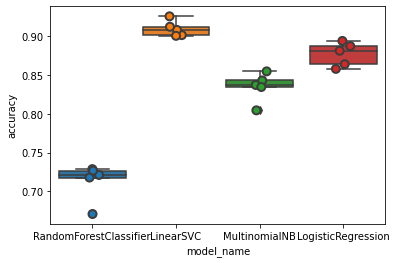

In [14]:
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=40),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

# Mean accuracy

In [16]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.909652
LogisticRegression        0.876918
MultinomialNB             0.834831
RandomForestClassifier    0.713088
Name: accuracy, dtype: float64